In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError

In [ ]:
# Helper Function
def generate_wave_data(num_samples, sequence_length, noise_level=0.1):
    x = np.linspace(0, num_samples * np.pi, sequence_length)
    frequency = np.random.uniform(1, 100, 2)
    amplitudes = np.random.rand(2)
    signal = (amplitudes[0] * (frequency[0] * np.cos(2 * np.pi * x)) +
              amplitudes[1] * (frequency[1] * np.cos(2 * np.pi * x)))
    noise = noise_level * np.random.randn(sequence_length)
    signal += noise
    return signal


In [ ]:
num_sequences = 1000
sequence_length = 256

all_signals = []
for i in range(num_sequences):
    wave = generate_wave_data(i, sequence_length)
    all_signals.append(wave)

data = np.array(all_signals)
data = data[:, :, np.newaxis]


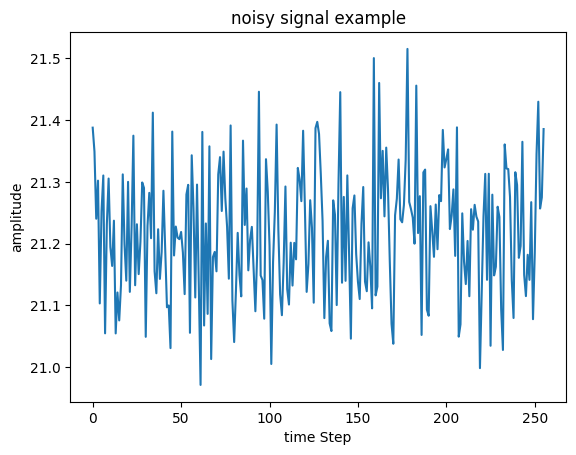

In [ ]:
plt.plot(data[0])
plt.title("noisy signal example")
plt.xlabel("time Step")
plt.ylabel("amplitude")
plt.show()


In [ ]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)


In [ ]:
input_layer = Input(shape=(sequence_length, 1))
x = Conv1D(16, kernel_size=3, activation='relu', padding='causal', dilation_rate=1)(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(32, kernel_size=3, activation='relu', padding='causal', dilation_rate=2)(x)
x = MaxPooling1D(pool_size=2)(x)
encoder_output = Conv1D(64, kernel_size=3, activation='relu', padding='causal', dilation_rate=4)(x)

x = UpSampling1D(size=2)(encoder_output)
x = Conv1D(32, kernel_size=3, activation='relu', padding='same')(x)
x = UpSampling1D(size=2)(x)
x = Conv1D(16, kernel_size=3, activation='relu', padding='same')(x)
decoder_output = Conv1D(1, kernel_size=3, activation='linear', padding='same')(x)

autoencoder = Model(input_layer, decoder_output)
autoencoder.compile(optimizer=Adam(0.001), loss='mse')


In [ ]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, X_test),
    verbose=1
)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 1667.1334 - val_loss: 1582.2820
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1341.3542 - val_loss: 1239.5881
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1043.8285 - val_loss: 1020.0334
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 922.8104 - val_loss: 793.6701
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 714.0066 - val_loss: 613.2652
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 605.2477 - val_loss: 484.5307
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 488.6731 - val_loss: 421.4326
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 446.5382 - val_loss: 381.4565
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 346.7466 - val_loss: 347.4066
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 434.8084 - val_loss: 315.2352
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 348.1342 - val_loss: 288.0668
Epoch 12/30
25

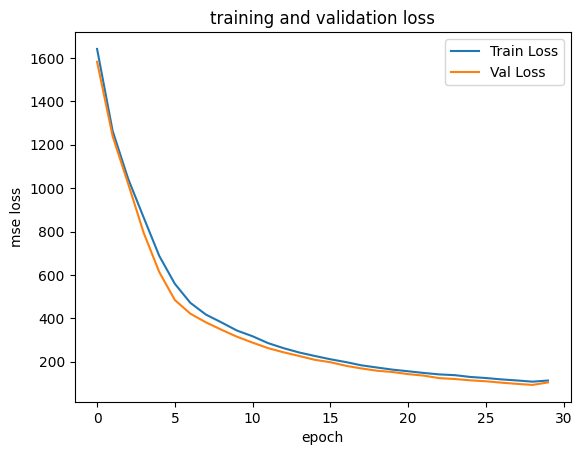

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("training and validation loss")
plt.xlabel("epoch")
plt.ylabel("mse loss")
plt.legend()
plt.show()


In [ ]:
predicted = autoencoder.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


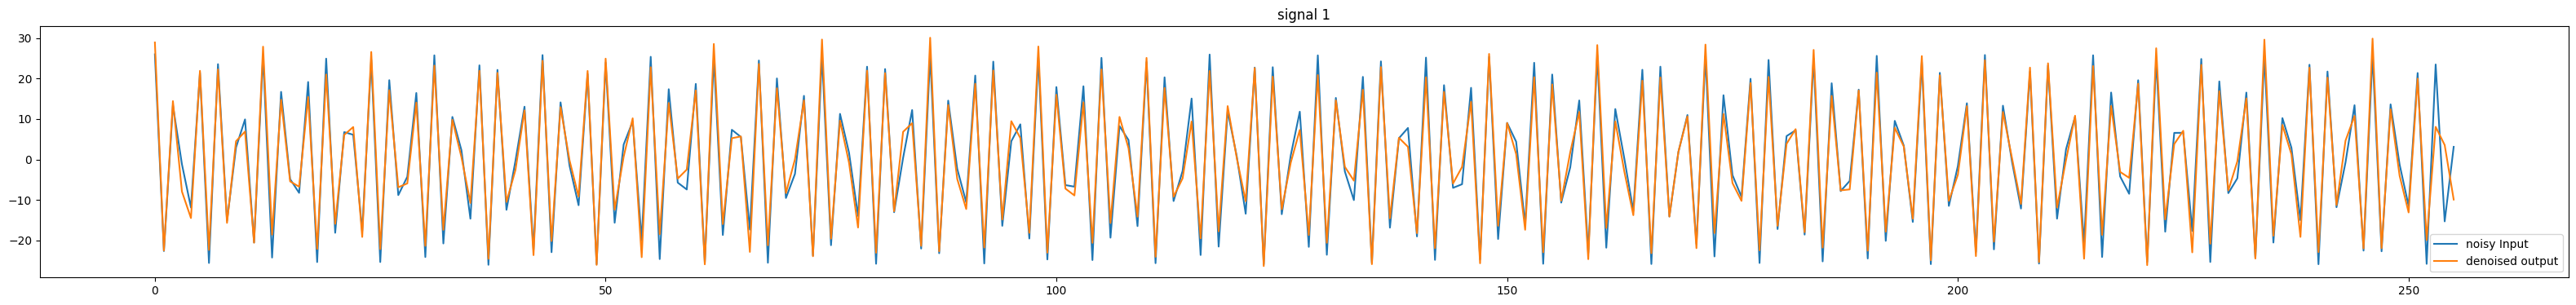

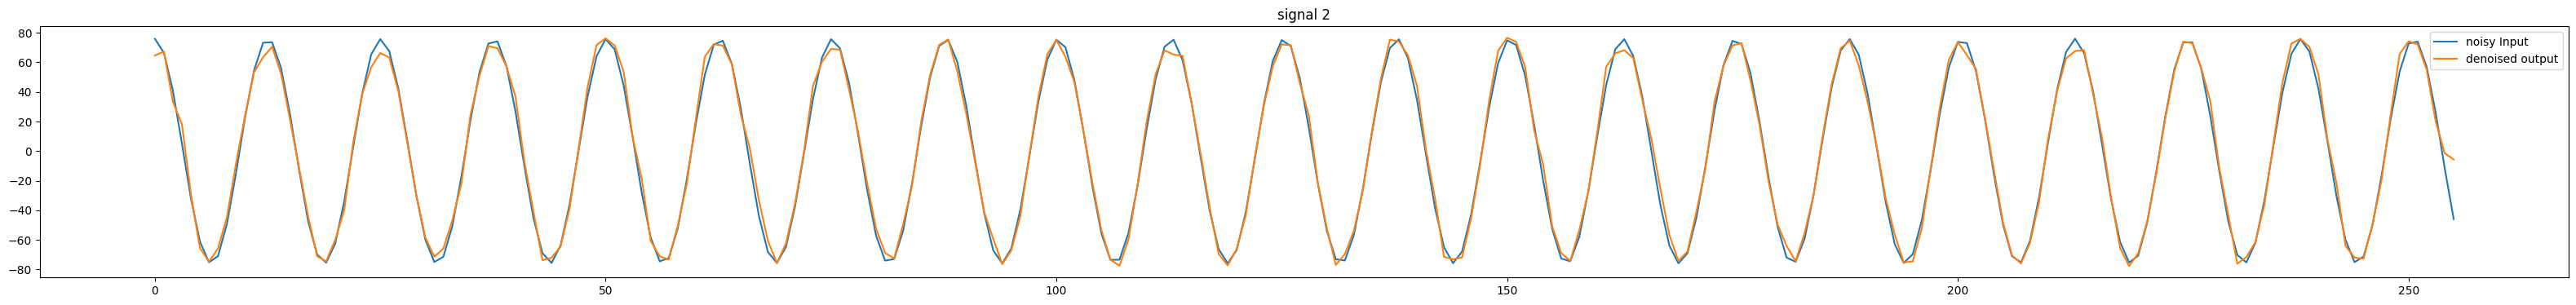

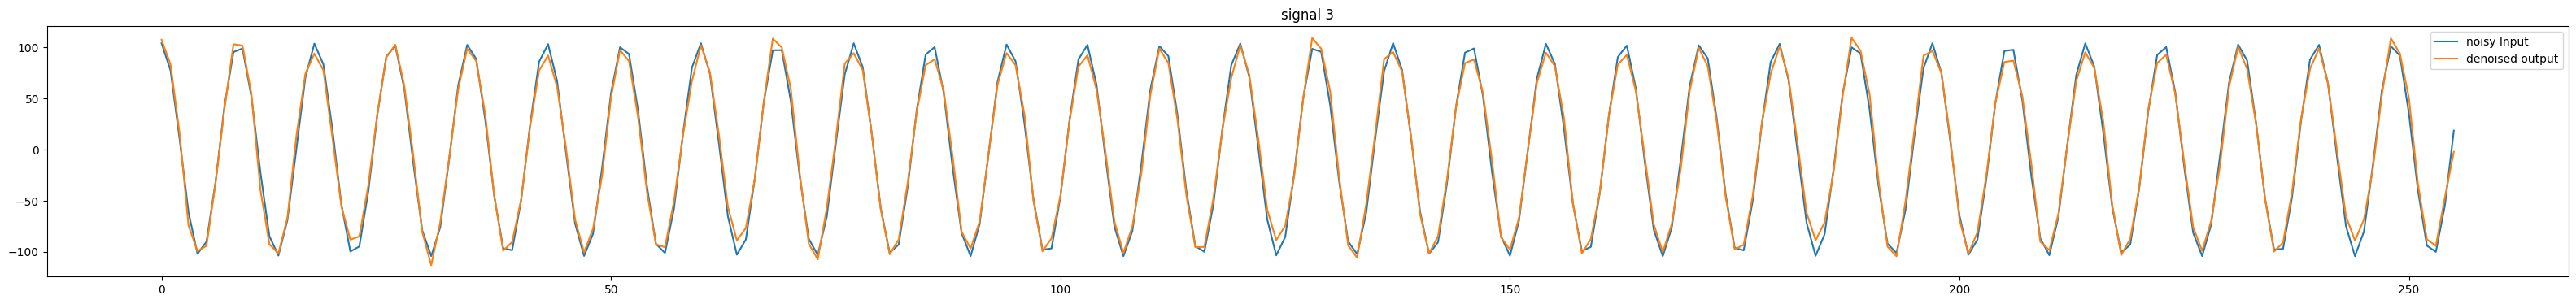

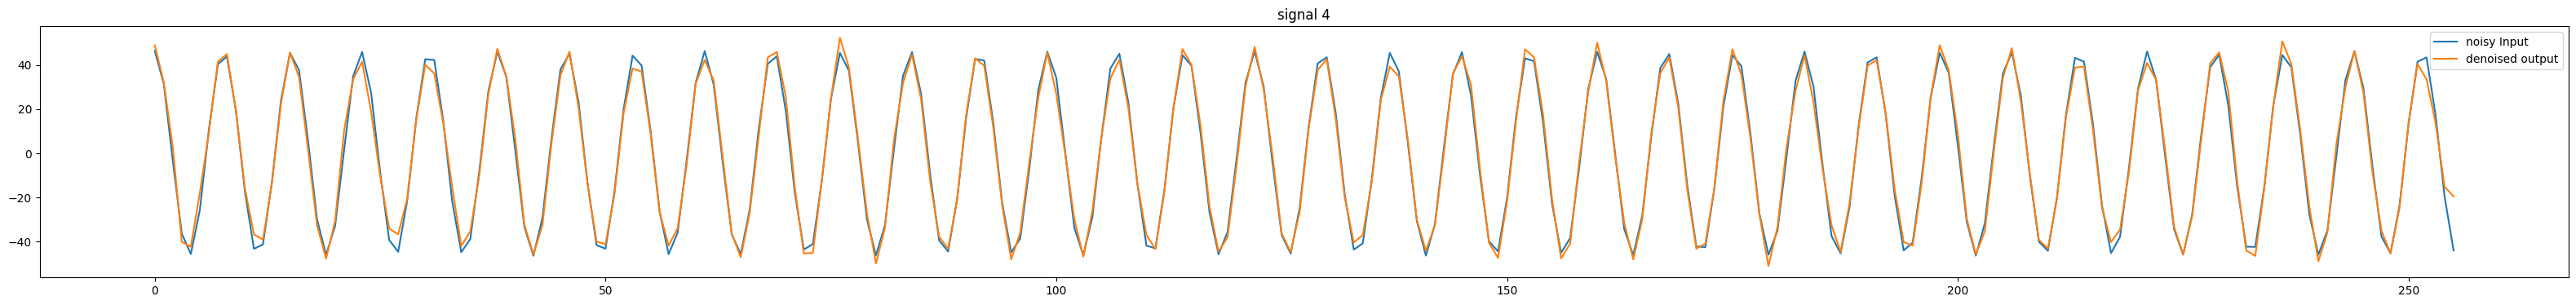

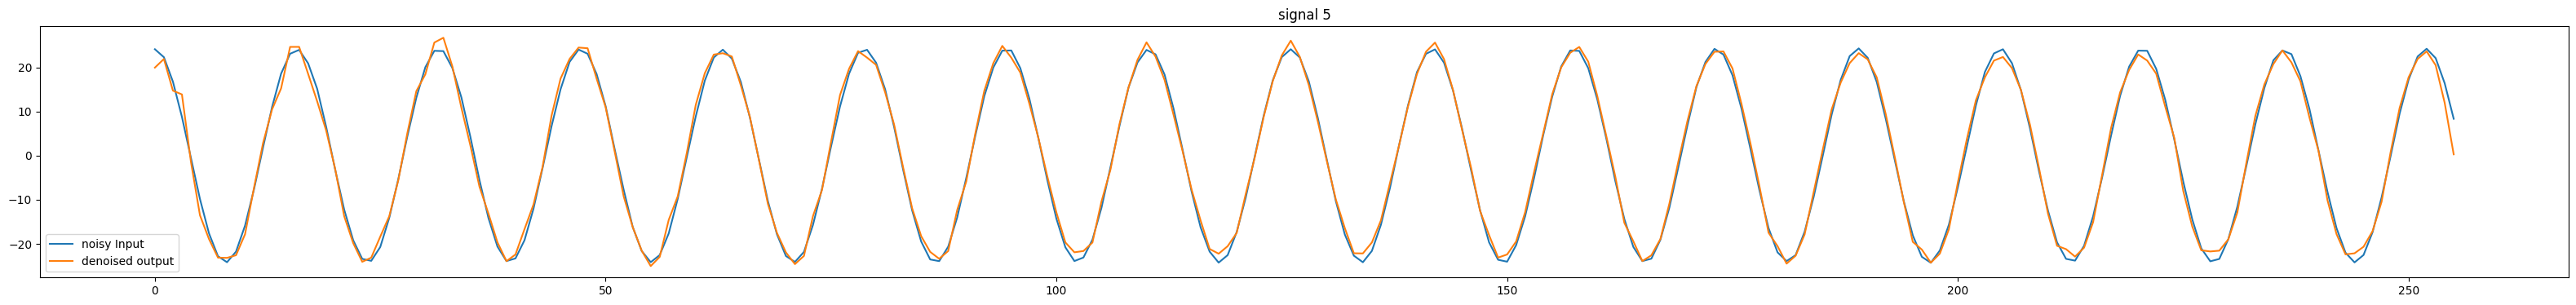

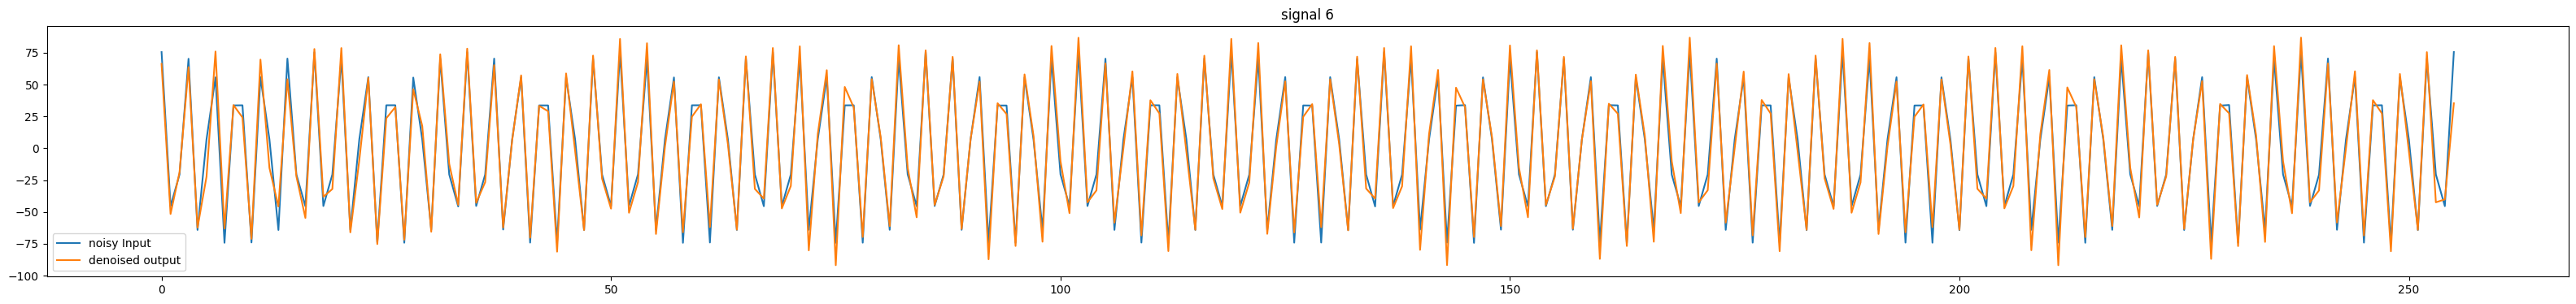

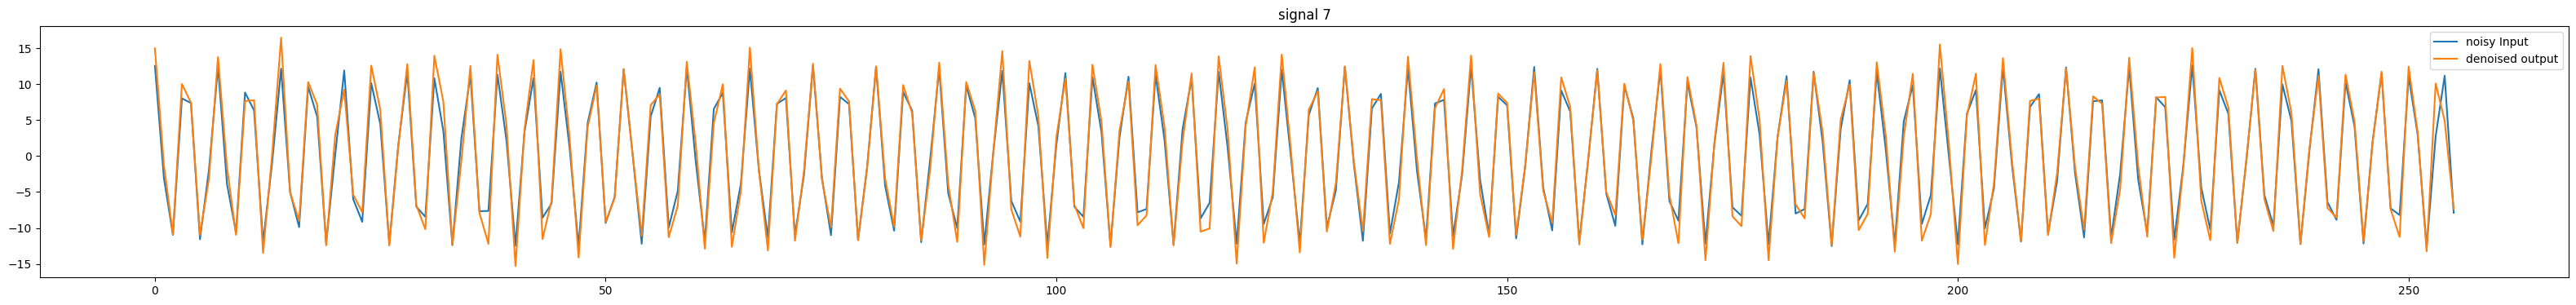

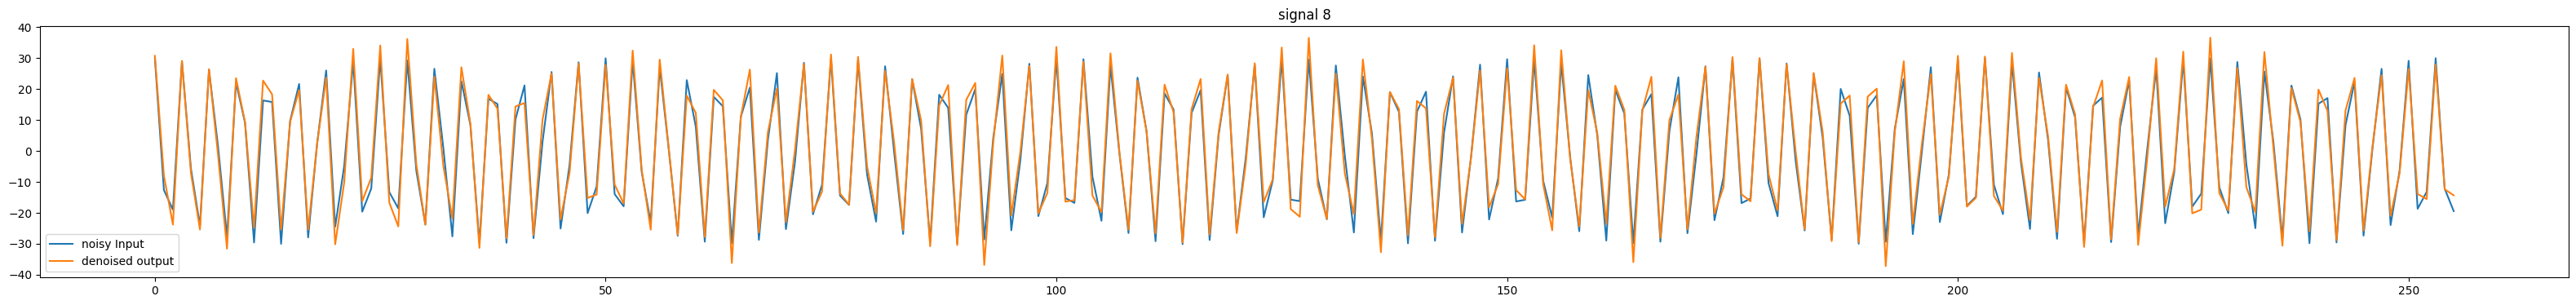

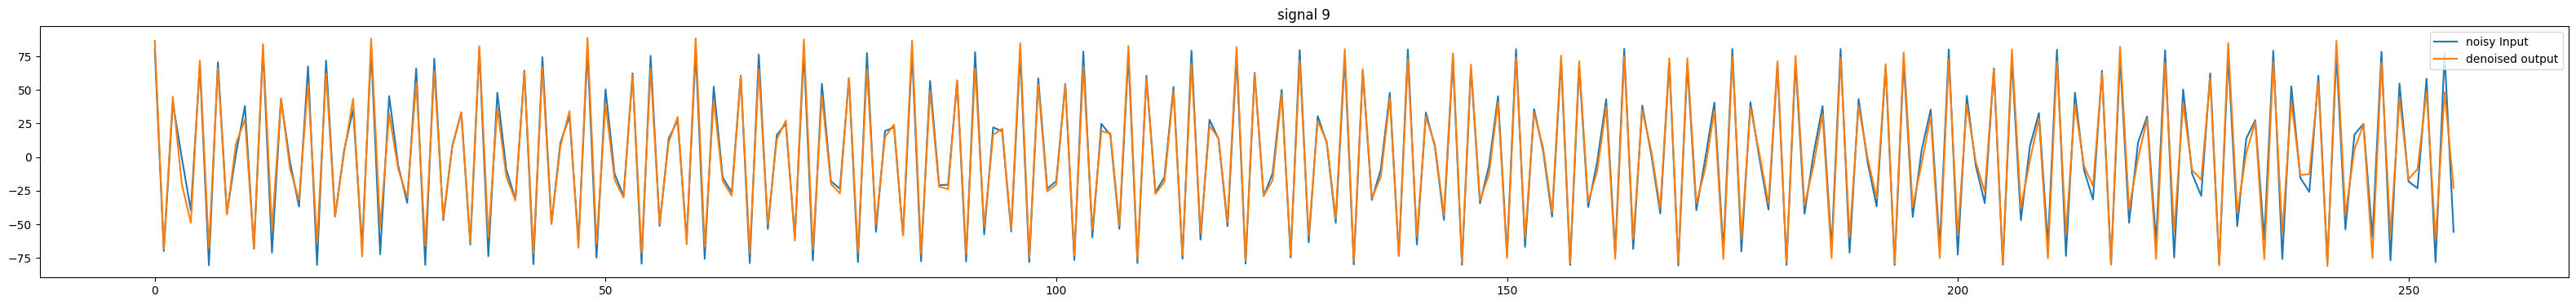

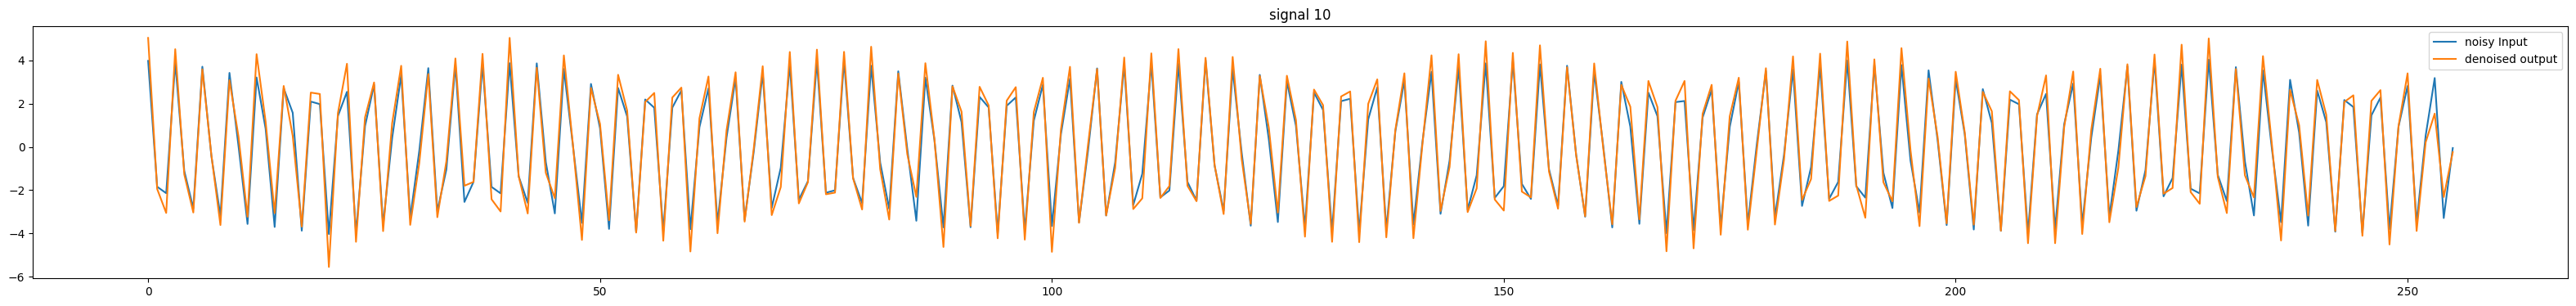

In [ ]:
n = 10
for i in range(n):
    plt.figure(figsize=(40, 4))
    plt.plot(X_test[i].squeeze(), label='noisy Input')
    plt.plot(predicted[i].squeeze(), label='denoised output')
    plt.title(f"signal {i+1}")
    plt.legend()
    plt.show()


In [ ]:
mse = MeanSquaredError()
mae = MeanAbsoluteError()

total_mse = mse(X_test, predicted).numpy()
total_mae = mae(X_test, predicted).numpy()

In [ ]:
print("mean squared error =", total_mse)
print("mean absolute error =", total_mae)

mean squared error = 104.58343
mean absolute error = 5.117207
